In [124]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Code di atas digunakan untuk

memanggil library cv2 dengan nama alias cv. Library ini digunakan untuk melakukan operasi dasar matriks

memanggil fungsi pyplot library matplotlib dengan nama alias plt. Library ini digunakan untuk membaca gambar

memanggil library numpy dengan nama alias np. Library ini digunakan untuk membuat matriks

code di bawah untuk membaca gambar menggunakan plt.imread() dan mengubah gambar menjadi grayscale, kemudian menampilkannya

Text(0.5, 1.0, 'Grayscale')

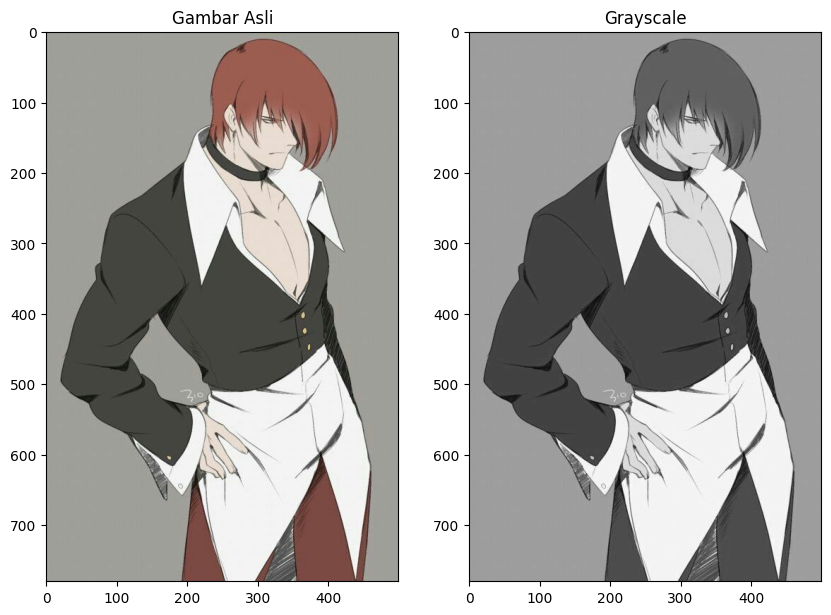

In [125]:
img = plt.imread('IoriYagami.jpg')
imgBu = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 8))  

plt.subplot(1, 2, 1) 
plt.imshow(img)
plt.title('Gambar Asli')

plt.subplot(1, 2, 2) 
plt.imshow(imgBu , cmap='gray')
plt.title('Grayscale')

1. Melakukan dekomposisi citra

lpf rentang 0.5,0,5 sampai 0.7,0.7
hpf renteng -0.5,0.5 sampai -0.7,0.7

In [126]:
lpf = np.array ([0.5, 0.6])
hpf = np.array ([-0.7,0.7])

code di atas adalah nilai kernel yaitu low pass filter dan high pass filter

In [127]:
def konvolusiBaris(gambar, kernel):
    padding = np.pad(gambar,((0,0),(0,1)), 'constant', constant_values=0)
    hasil = np.zeros(gambar.shape).astype(np.float32)

    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]- len(kernel)+1):
            for x in range(len(kernel)):
                hasil[i,j] += padding[i, j+x]*kernel[x]

    return hasil

def konvolusiKolom(gambar, kernel):
    padding = np.pad(gambar,((0,1),(0,0)), 'constant', constant_values=0)
    hasil = np.zeros(gambar.shape).astype(np.float32)

    for i in range(gambar.shape[0] - len(kernel)+1):
        sum=0
        for j in range(gambar.shape[1]):
            for x in range(len(kernel)):
                hasil[i,j] += padding[i+x, j]*kernel[x]

    return hasil

code di atas adalah code untuk melakukan konvolusi pada setiap baris dan kolom dengan kernel yang diberikan

In [128]:
def downsamplingBaris(gambar):
    hasil = np.zeros((gambar.shape[0]//2, gambar.shape[1])).astype(np.float32)

    for i in range(gambar.shape[0]//2):
        # x=0
        for j in range(gambar.shape[1]):
            hasil[i,j] = gambar[2*i, j]        #[x][j]
        # x+=2
    return hasil

code di atas untuk melakukan downsampling pada setiap baris citra (secara horizontal)

code di atas memiliki 2 iterasi, iterasi pertama adalah iterasi baris per baris dengan langkah 2 untuk mengambil setiap baris kedua, kemudian iterasi kedua adalah kolom per kolom

fungsi ini mengimplementasikan downsampling pada gambar secara horizontal dengan mengurangi jumlah baris menjadi setengah dari gambar asli.

In [129]:
def downsamplingKolom(gambar):
    hasil = np.zeros((gambar.shape[0], gambar.shape[1]//2)).astype(np.float32)

    for i in range(gambar.shape[0]):
        # x=0
        for j in range(gambar.shape[1]//2):
            hasil[i,j] = gambar[i, 2*j]     #[i][x]
        # x+=2
    return hasil

code di atas untuk melakukan downsampling pada setiap kolom citra (secara vertikal)

code di atas memiliki 2 iterasi, iterasi pertama adalah iterasi baris per baris, kemudian iterasi kedua adalah kolom per kolom dengan 2 langkah untuk mengambil kolom kedua

fungsi ini mengimplementasikan downsampling pada gambar secara vertikal dengan mengurangi jumlah kolom menjadi setengah dari gambar asli.

In [130]:
def dekomposisi(gambar, level):
    konvolusiBarisLow = konvolusiBaris(gambar, lpf)
    konvolusiBarisHigh = konvolusiBaris(gambar, hpf)

    ds_kolLow = downsamplingKolom(konvolusiBarisLow)
    konvolusiKolomLow = konvolusiKolom(ds_kolLow, lpf)
    aproximate = downsamplingBaris(konvolusiKolomLow)

    konvolusiKolomHigh = konvolusiKolom(ds_kolLow, hpf)
    horizontal = downsamplingBaris(konvolusiKolomHigh)

    ds_kolHigh = downsamplingKolom(konvolusiBarisHigh)
    konvolusiKolomLow = konvolusiKolom(ds_kolHigh, lpf)
    vertikal = downsamplingBaris(konvolusiKolomLow)

    konvolusiKolomHigh = konvolusiKolom(ds_kolHigh, hpf)
    diagonal = downsamplingBaris(konvolusiKolomHigh)
    
    hasil = np.vstack((np.hstack((aproximate, horizontal)), np.hstack((vertikal, diagonal))))
    hasil_norm = (hasil - np.min(hasil)) / (np.max(hasil) - np.min(hasil))*255
    # horizontal_norm = (horizontal - np.min(horizontal)) / (np.max(horizontal) - np.min(horizontal))*255
    # vertikal_norm = (vertikal - np.min(vertikal)) / (np.max(vertikal) - np.min(vertikal)) * 255
    # diagonal_norm = (diagonal - np.min(diagonal)) / (np.max(diagonal) - np.min(diagonal)) * 255

    if level> 1:
        aproximate, horizontal, vertikal, diagonal, hasil_norm = dekomposisi(aproximate, level-1)
        return aproximate, horizontal, vertikal, diagonal, hasil_norm
    else:
        return aproximate, horizontal, vertikal, diagonal, hasil_norm

code di atas ada fungsi untuk proses dekomposisi citra menggunakan metode wavelet dengan memanfaatkan filter rendah dan tinggi untuk menghasilkan beberapa level komponen frekuensi dari citra input, seperti LL,LH,HL dan HH

code di bawah adalah pemanggilan fungsi dekomposisi untuk menampilkan hasil dekomposisi

Text(0.5, 1.0, 'hasil')

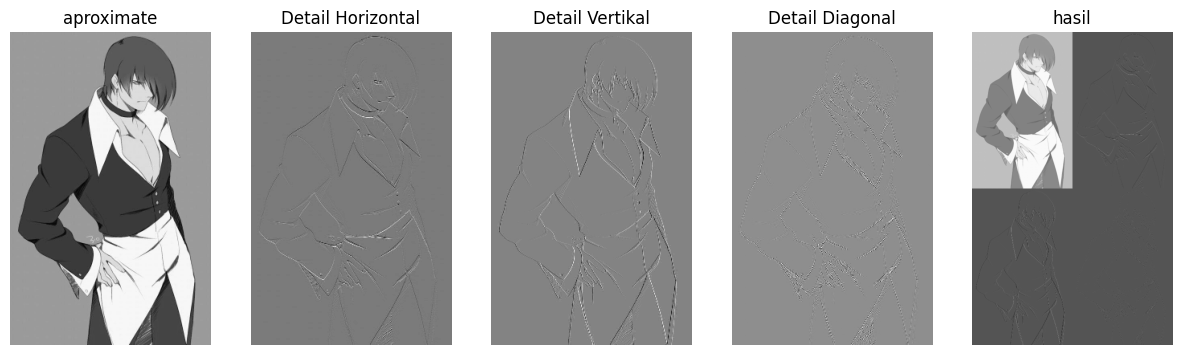

In [131]:
# aproximate, horizontal_norm, vertikal_norm, diagonal_norm, lvl1 = dekomposisi(imgBu,1)
aproximate, horizontal, vertikal, diagonal, lvl1 = dekomposisi(imgBu,1)
fig, ax = plt.subplots(nrows = 1, ncols= 5, figsize=(15,10))
for a in ax:
    a.axis('off')

ax[0].imshow(aproximate, cmap='gray')
ax[0].set_title('aproximate')
ax[1].imshow(horizontal, cmap='gray')
ax[1].set_title('Detail Horizontal')
ax[2].imshow(vertikal, cmap='gray')
ax[2].set_title('Detail Vertikal')
ax[3].imshow(diagonal, cmap='gray')
ax[3].set_title('Detail Diagonal')
ax[4].imshow(lvl1, cmap='gray')
ax[4].set_title('hasil')

# ax[0].imshow(aproximate, cmap='gray')
# ax[0].set_title('aproximate')
# ax[1].imshow(horizontal_norm, cmap='gray')
# ax[1].set_title('Detail Horizontal')
# ax[2].imshow(vertikal_norm, cmap='gray')
# ax[2].set_title('Detail Vertikal')
# ax[3].imshow(diagonal_norm, cmap='gray')
# ax[3].set_title('Detail Diagonal')
# ax[4].imshow(lvl1, cmap='gray')
# ax[4].set_title('hasil')


code di bawah untuk menampilkan hasil dekomposisi dari level 3,4 dan 5

Text(0.5, 1.0, 'level 5')

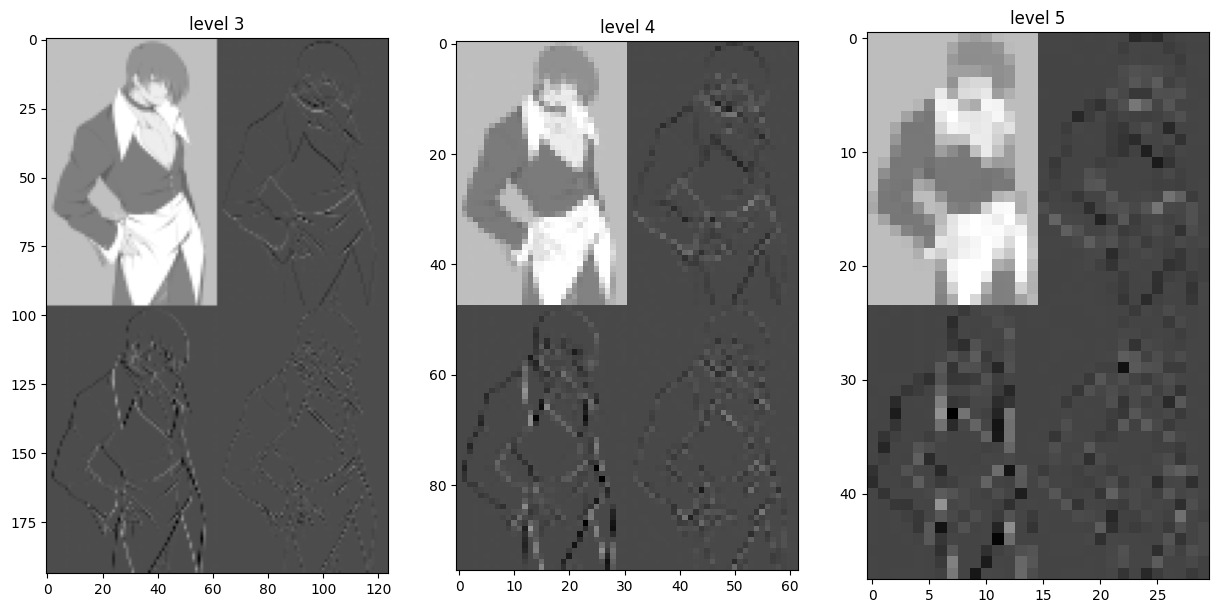

In [132]:
_, _, _, _, lvl3 = dekomposisi(imgBu,3)
_, _, _, _, lvl4 = dekomposisi(imgBu,4)
_, _, _, _, lvl5 = dekomposisi(imgBu,5)

fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize=(15,10))
ax[0].imshow(lvl3, cmap='gray')
ax[0].set_title('level 3')
ax[1].imshow(lvl4, cmap='gray')
ax[1].set_title('level 4')
ax[2].imshow(lvl5, cmap='gray')
ax[2].set_title('level 5')

code di bawah digunakan untuk menampilkan hasil akhir/hasil gabungan dari hasil level 3,4 dan 5

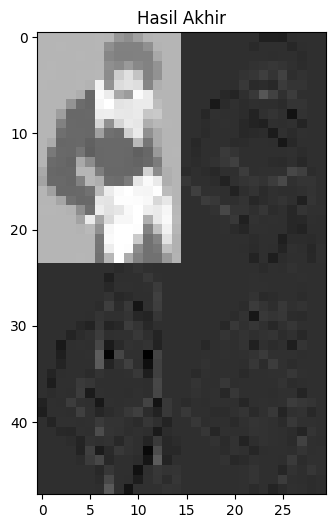

In [133]:
# Menyesuaikan ukuran gambar hasil dekomposisi pada level yang lebih tinggi agar sesuai dengan ukuran gambar pada level 5
lvl3_resized = cv2.resize(lvl3, (lvl5.shape[1], lvl5.shape[0]))
lvl4_resized = cv2.resize(lvl4, (lvl5.shape[1], lvl5.shape[0]))

# Menambahkan hasil dari masing-masing level secara bertahap
final_result = lvl5 + lvl4_resized + lvl3_resized

# Menampilkan hasil akhir
plt.figure(figsize=(8, 6))
plt.imshow(final_result, cmap='gray')
plt.title('Hasil Akhir')
plt.show()

2. Melakukan rekonstruksi dari hasil dekomposisi

In [134]:
#Fungsi Upsampling
def upSamplingBaris(gambar):
    hasil = np.zeros((gambar.shape[0]*2, gambar.shape[1])).astype(int)
    x=0
    for i in range (gambar.shape[0]):
        for j in range(gambar.shape[1]):
            hasil[x,j] = gambar[i][j]
            hasil[x+1, j] = gambar[i][j]
        x+=2
    return hasil

def upSamplingKolom(gambar):
    hasil = np.zeros((gambar.shape[0], gambar.shape[1]*2)).astype(int)
    for i in range (gambar.shape[0]):
        x=0
        for j in range(gambar.shape[1]):
            hasil[i,x] = gambar[i][j]
            hasil[i, x+1] = gambar[i][j]
            x+=2
    return hasil

code di atas adalah fungsi upsampling baris dan kolom.
Kedua fungsi ini berguna dalam proses rekonstruksi citra setelah proses dekomposisi dilakukan, karena dalam proses dekomposisi, citra di-downsample pada setiap level untuk menghasilkan komponen wavelet. Upsampling digunakan untuk mengembalikan ukuran citra ke ukuran aslinya sebelum dilakukan dekomposisi.

In [135]:
def rekonstruksi(aproximate, horizontal, vertikal, diagonal):
    upSampbar_a = upSamplingBaris(aproximate)
    upSampbar_h = upSamplingBaris(horizontal)
    upSampbar_v = upSamplingBaris(vertikal)
    upSampbar_d = upSamplingBaris(diagonal)

    konvolusiKolomLow = konvolusiKolom(upSampbar_a, lpf)
    konvolusiKolomHigh = konvolusiKolom(upSampbar_h, hpf)
    us_lowHigh = upSamplingKolom(konvolusiKolomHigh + konvolusiKolomLow )
    konvolusiBarisLow = konvolusiBaris(us_lowHigh, lpf)

    konvolusiKolomLow = konvolusiKolom(upSampbar_v, lpf)
    konvolusiKolomHigh = konvolusiKolom(upSampbar_d, hpf)
    us_lowHigh = upSamplingKolom(konvolusiKolomHigh + konvolusiKolomLow )
    konvolusiBarisHigh = konvolusiBaris(us_lowHigh, hpf)

    hasil = konvolusiBarisHigh + konvolusiBarisLow
    return hasil


code di atas adalah fungsi rekonstruksi yang bertujuan untuk membangun kembali citra asli dari komponen hasil dekomposisi wavalet.

Prosesnya dimulai dengan upsampling baris untuk setiap komponen dekomposisi, diikuti oleh konvolusi kolom untuk mereduksi aliasing. Kemudian, dilakukan upsampling kolom untuk hasil konvolusi, diikuti oleh konvolusi baris untuk mereduksi aliasing pada dimensi baris. Langkah ini diulang untuk komponen detail vertikal dan diagonal. Akhirnya, hasil konvolusi baris dari komponen aproksimasi dan detail dijumlahkan untuk menghasilkan citra rekonstruksi.

code di bawah untuk menampilkan hasil rekonstruksi

Text(0.5, 1.0, 'Rekonstruksi')

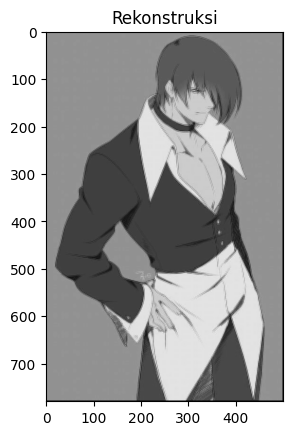

In [136]:
rekonstruksi = rekonstruksi(aproximate, horizontal, vertikal, diagonal)
plt.imshow(rekonstruksi, cmap='gray')
plt.title('Rekonstruksi')

3. Pada level berapa hasil dari dekomposisi berikut? berikan alasannya

code di bawah untuk menampilkan gambar dari folder asset

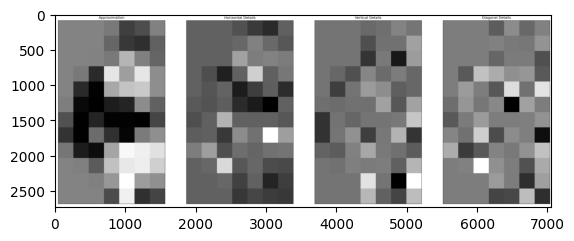

In [137]:
gambar = plt.imread('Assets/___dekomposisi.png')
plt.imshow(gambar, cmap='gray')

code di bawah untuk menampilkan dekomposisi gambar pada setiap level, dalam hal ini percobaan dilakukan sampai level 7

berdasarkan hasil tampilan proses di bawah, maka dapat diketahui bahwa gambar di atas adalah gambar pada level 6.

Berdasarkan tampilan per level dari code di bawah juga dapat disimpulkan bahwa hasil
dari dekomposisi tiap level (level makin tinggi/angkanya besar) resolusinya menjadi semakin berkurang, sampai gambar terlihaat tidak jelas

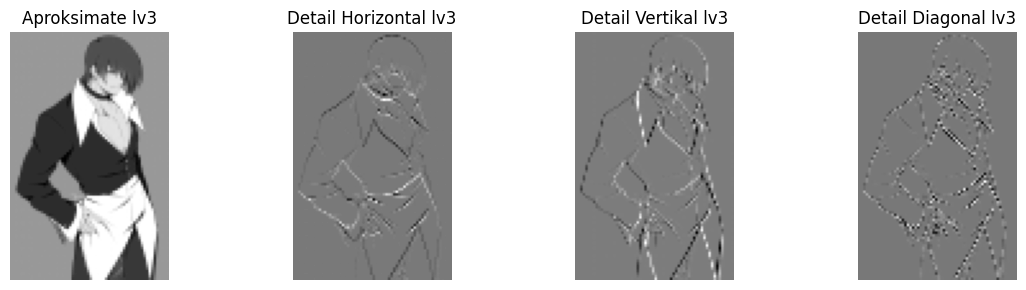

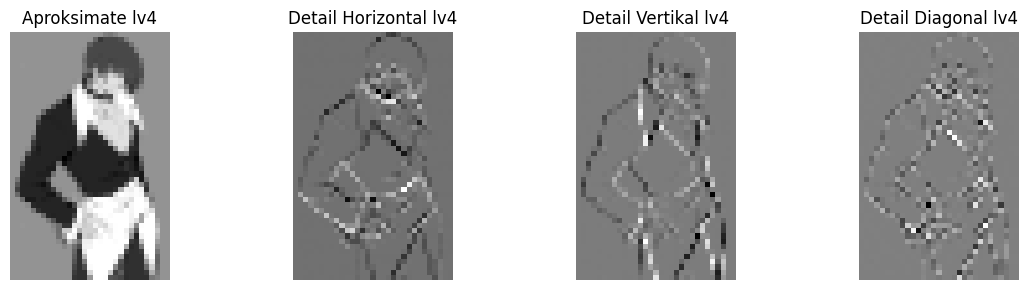

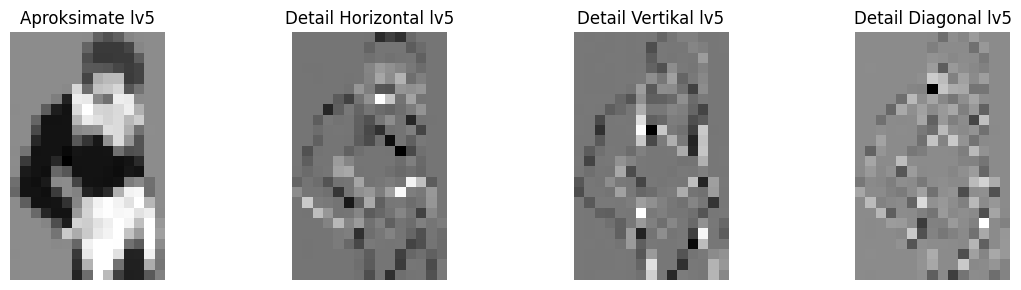

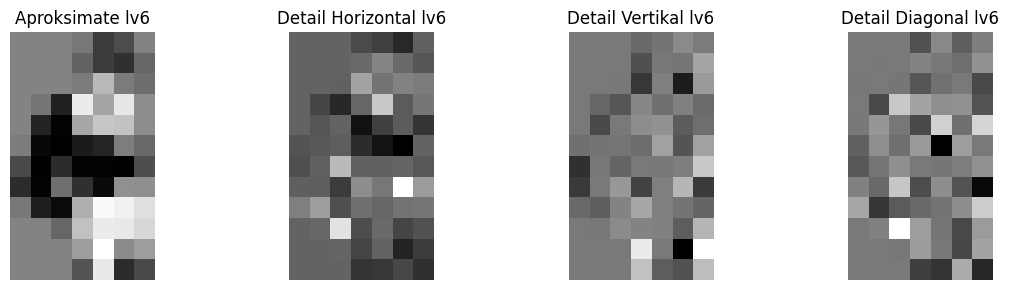

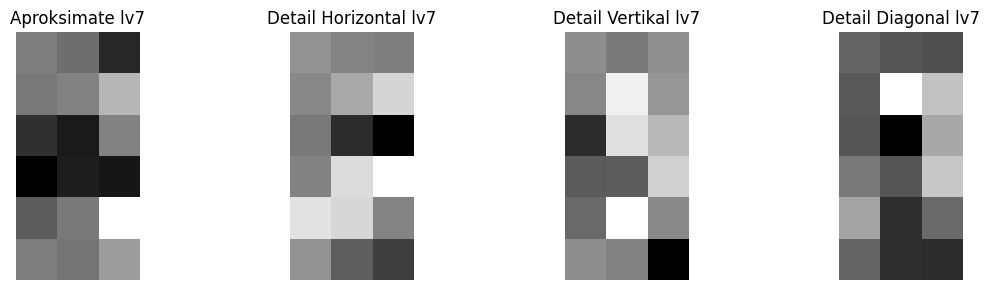

In [138]:
for i in range(3, 8):  # Misalnya, tampilkan level 3 hingga 7
    aproximate, horizontal, vertikal, diagonal, lvl = dekomposisi(imgBu, i)
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))
    for a in ax:
        a.axis('off')

    ax[0].imshow(aproximate, cmap='gray')
    ax[0].set_title('Aproksimate lv{}'.format(i))
    ax[1].imshow(horizontal, cmap='gray')
    ax[1].set_title('Detail Horizontal lv{}'.format(i))
    ax[2].imshow(vertikal, cmap='gray')
    ax[2].set_title('Detail Vertikal lv{}'.format(i))
    ax[3].imshow(diagonal, cmap='gray')
    ax[3].set_title('Detail Diagonal lv{}'.format(i))

    plt.tight_layout()
    plt.show()

In [139]:
# for i in range(3, 8):  # Tampilkan level 3 hingga 7
#     aproximate, horizontal, vertikal, diagonal, lvl = dekomposisi(imgBu, i)
#     if i == 6:  # Jika level adalah 6
#         aproximate_lvl6 = aproximate
#         horizontal_lvl6 = horizontal
#         vertikal_lvl6 = vertikal
#         diagonal_lvl6 = diagonal

4. Menampilkan sinyal pada hasil dekomposisi pada nomor 3

In [140]:
def grafik_dekom(gambar, color):
    gambar = gambar.flatten()
    plt.plot(gambar, color)

code di atas adalah fungsi untuk membuat grafik

kemudian code di bawah untuk menampilkan grafiknya

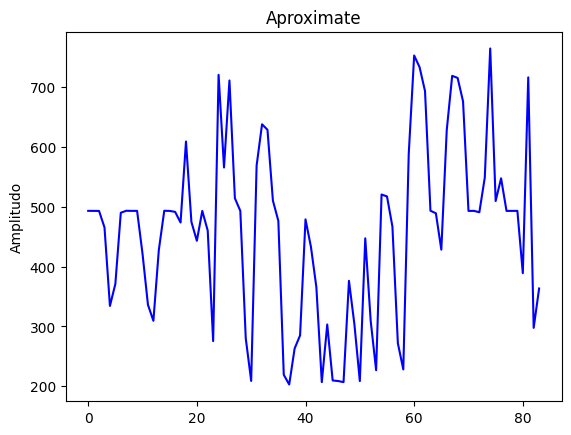

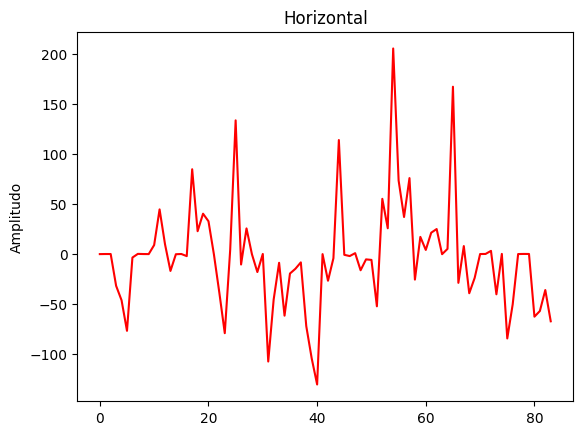

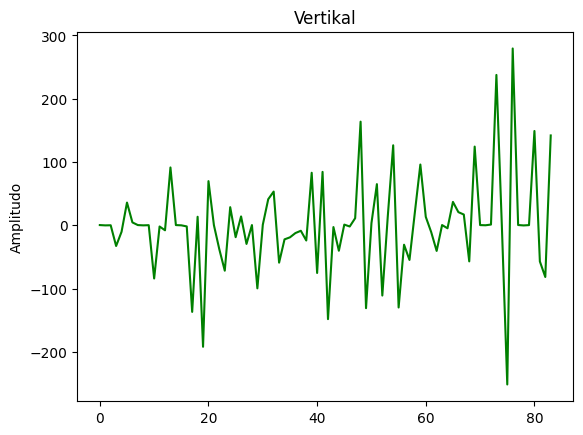

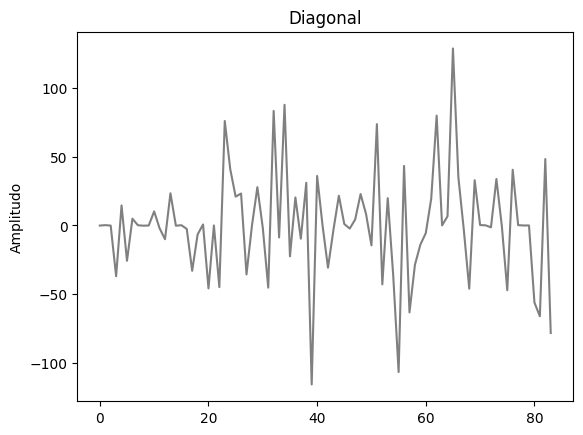

In [141]:
aproximate, horizontal, vertikal, diagonal, _ = dekomposisi(imgBu, 6)
if aproximate is not None and horizontal is not None and vertikal is not None and diagonal is not None:
    grafik_dekom(aproximate, color='blue')
    plt.title("Aproximate")
    plt.ylabel("Amplitudo")
    plt.show()
    grafik_dekom(horizontal, color='red')
    plt.title("Horizontal")
    plt.ylabel("Amplitudo")
    plt.show()
    grafik_dekom(vertikal, color='green')
    plt.title("Vertikal")
    plt.ylabel("Amplitudo")
    plt.show()
    grafik_dekom(diagonal, color='gray')
    plt.title("Diagonal")
    plt.ylabel("Amplitudo")
    plt.show()
else:
    print("Gagal melakukan dekomposisi.")